In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import calendar
import re
from nltk.tokenize import word_tokenize , sent_tokenize
from spellchecker import SpellChecker
import pyphen
import string
import json
from classifiers import *
from regression import *
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
import seaborn as sns

In [2]:
data = pd.read_csv("mynewcsv.csv",engine='python',error_bad_lines=False)
oldData = pd.read_csv("datasets/merged_data.csv",engine='python',error_bad_lines=False)
print(oldData['id'].nunique())
oldData = oldData.drop_duplicates('id')
oldData.columns = oldData.columns.str.replace('_y','')
oldData.columns


131919


Index(['id', 'photo', 'blurb', 'slug', 'disable_communication',
       'country_displayable_name', 'currency_symbol', 'currency_trailing_code',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged',
       'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type',
       'creator', 'location', 'profile', 'spotlight', 'urls', 'source_url',
       'friends', 'is_starred', 'is_backing', 'permissions', 'ID', 'name',
       'category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [4]:
# oldData['id']
oldData = oldData.merge(data, left_on='id',right_on='id')
oldData.shape

(69210, 82)

Log scale the attributes

In [5]:
# data['usd_pledged_real']=np.log(1+data['usd_pledged_real'])
# data['usd_goal_real']=np.log(1+data['usd_goal_real'])
# data['mean_category_goal']=np.log(1+data['mean_category_goal'])
# data['mean_main_category_goal']=np.log(1+data['mean_main_category_goal'])
# data['creator_successful']=np.log(1+data['creator_successful'])
# data['imageCount']=np.log(1+data['imageCount'])

Drop the features we don't need

In [6]:
# filtered_data=data.drop(["category_count","main_category_count","no_video","diff_mean_category_goal","diff_mean_main_category_goal","no_weekend","id"],axis=1)

# collinear_features = ['creator_total', 'aboutNumSents', 'risksNumSents']
# low_importance_class = ['blurbNumSents', 'yes_weekend']
# filtered_data = filtered_data.drop(collinear_features,axis=1)
# filtered_data = filtered_data.drop(low_importance_class,axis=1)
# filtered_data=filtered_data.drop(["mean_category_goal","mean_main_category_goal"],axis=1)

In [7]:
pd.set_option('display.max_columns', None)
# filtered_data.describe()

In [8]:
df = data

In [9]:
df.state

0        1
1        1
2        1
3        1
4        1
        ..
69205    1
69206    1
69207    1
69208   -1
69209    1
Name: state, Length: 69210, dtype: int64

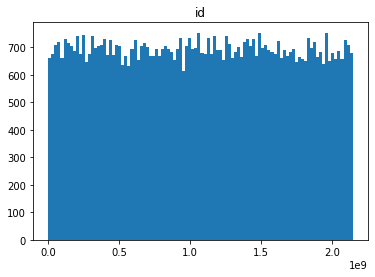

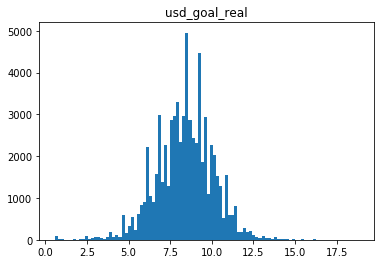

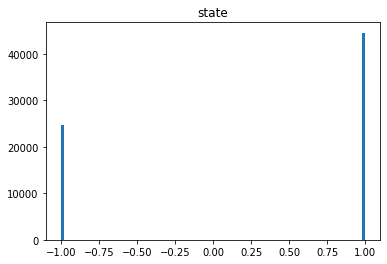

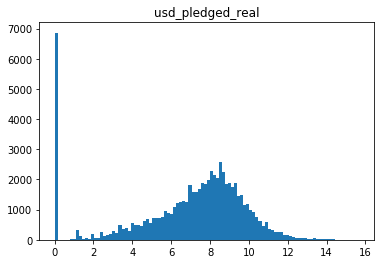

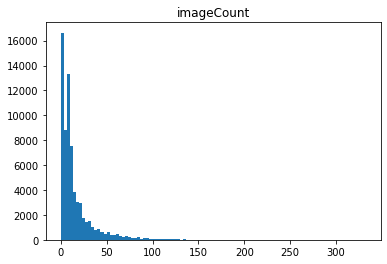

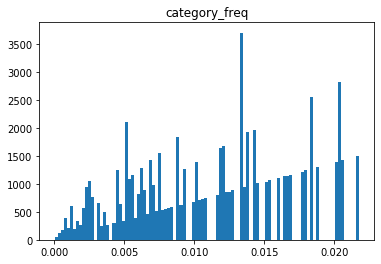

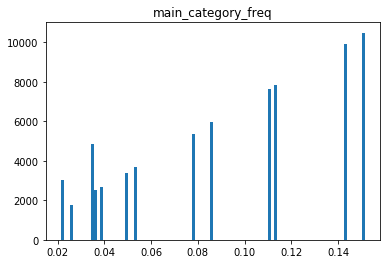

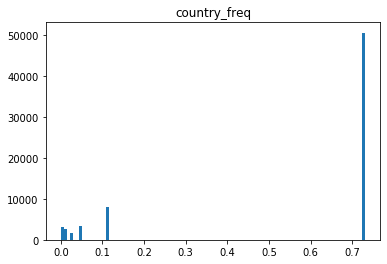

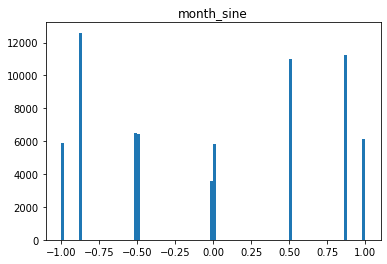

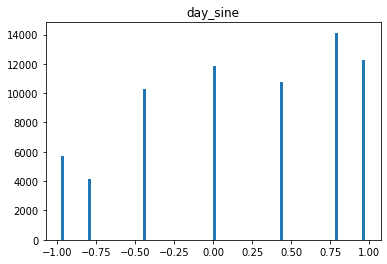

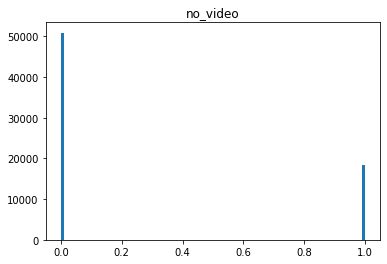

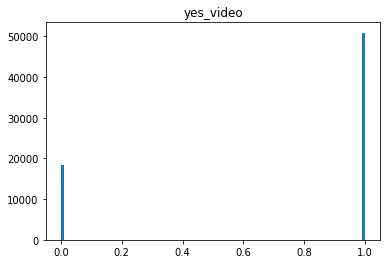

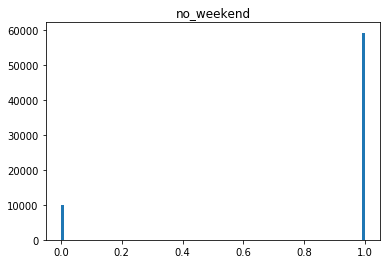

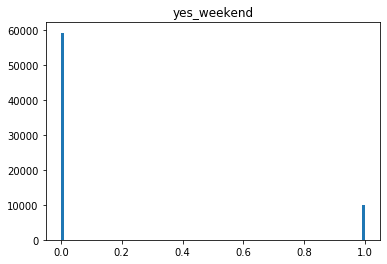

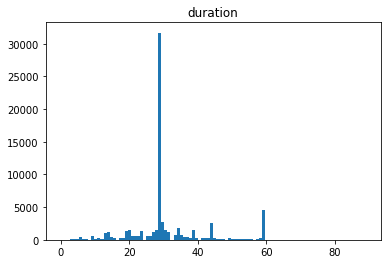

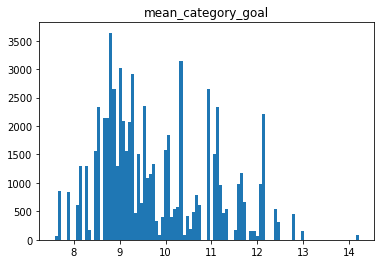

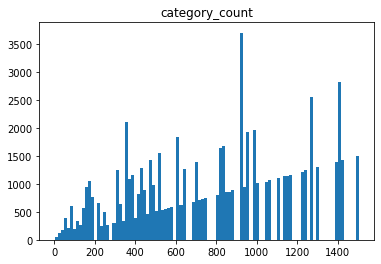

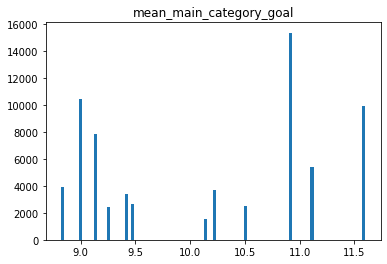

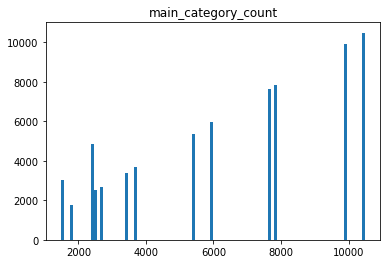

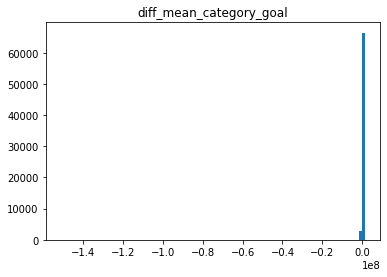

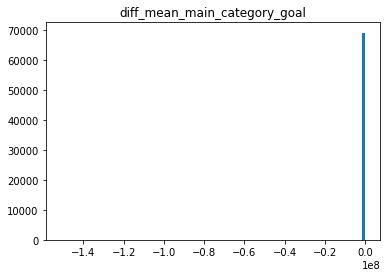

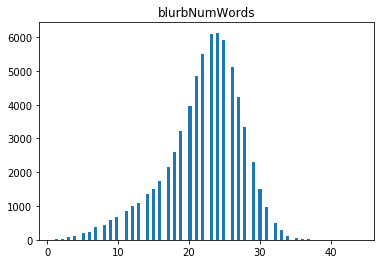

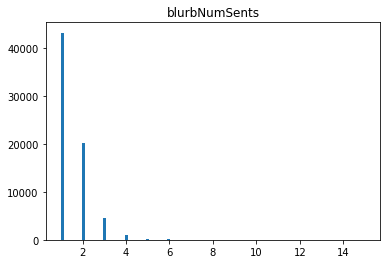

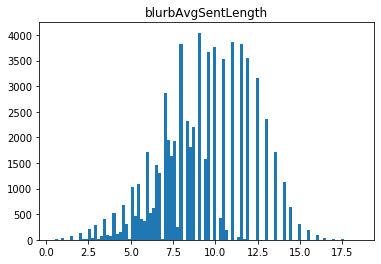

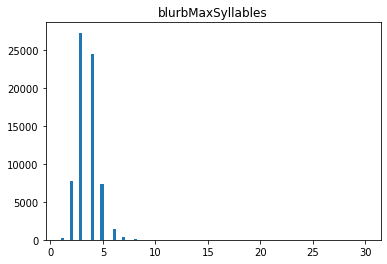

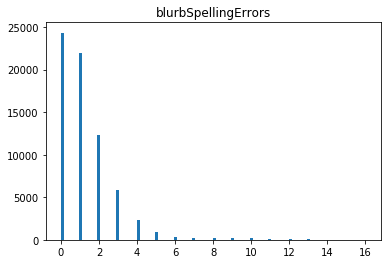

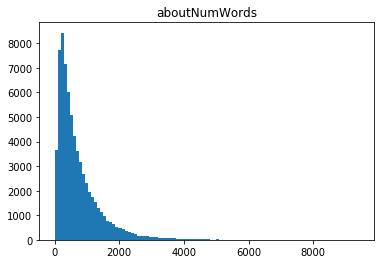

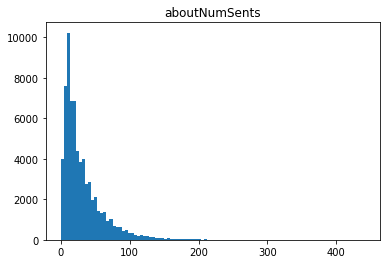

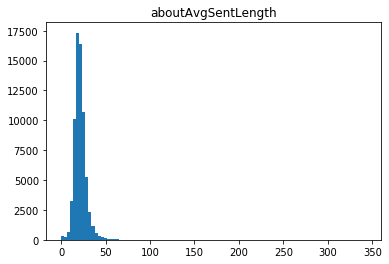

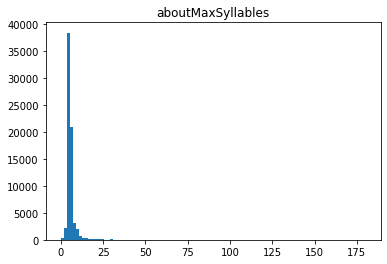

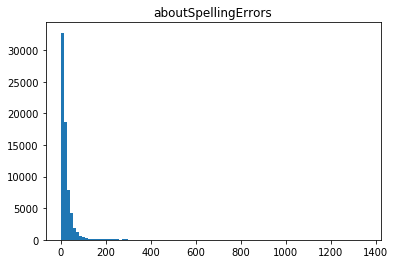

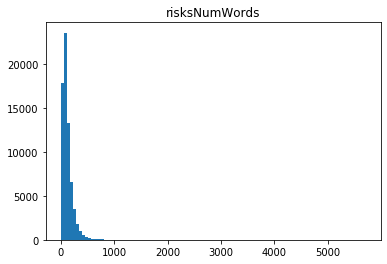

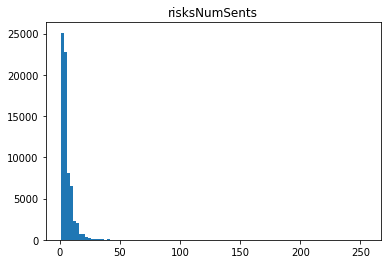

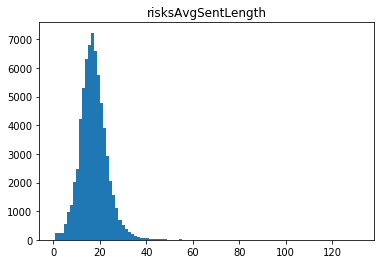

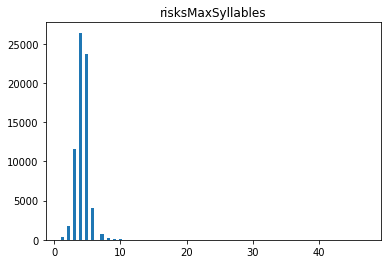

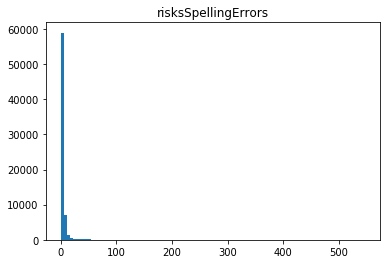

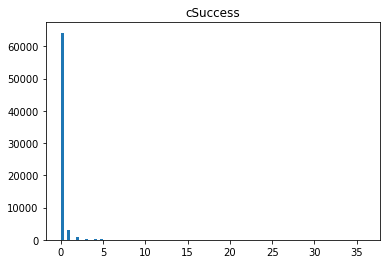

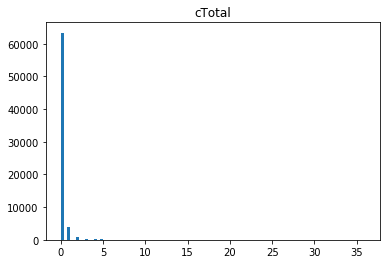

In [10]:
for column in df:
    plt.hist(df[column],bins=100)
    plt.title(column)
    plt.show()
    

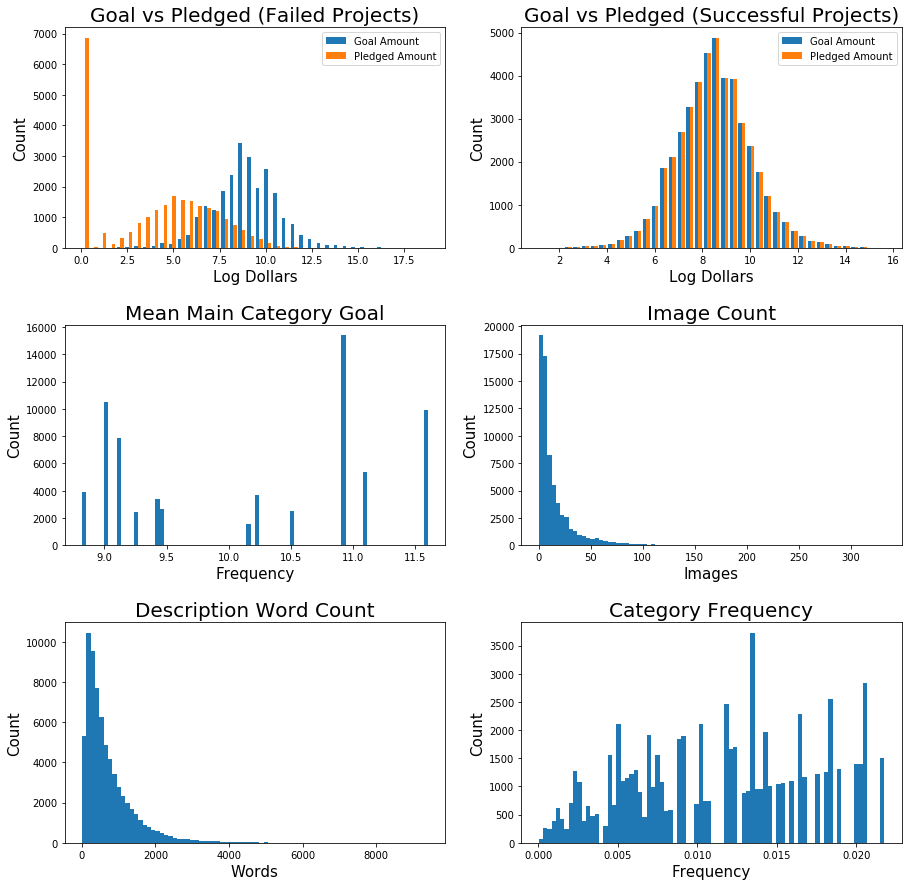

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
fig, ax = plt.subplots(3,2,figsize=(15, 15))
fail = df[df.state==-1]
ax[0,0].hist([fail['usd_goal_real'],fail['usd_pledged_real']],bins=40,stacked=False)
ax[0,0].legend(['Goal Amount','Pledged Amount'])
ax[0,0].set_xlabel('Log Dollars', fontsize=15)
ax[0,0].set_ylabel('Count', fontsize=15)
ax[0,0].set_title('Goal vs Pledged (Failed Projects)',fontsize=20)
success = df[df.state==1]
ax[0,1].hist([success['usd_pledged_real'],success['usd_pledged_real']],bins=40,stacked=False)
ax[0,1].legend(['Goal Amount','Pledged Amount'])
ax[0,1].set_xlabel('Log Dollars', fontsize=15)
ax[0,1].set_ylabel('Count', fontsize=15)
ax[0,1].set_title('Goal vs Pledged (Successful Projects)',fontsize=20)

# ax[1,0].hist([df['mean_category_goal']],bins=80,stacked=False)
# ax[1,0].set_xlabel('Frequency', fontsize=15)
# ax[1,0].set_ylabel('Count', fontsize=15)
# ax[1,0].set_title('Mean Category Goal',fontsize=20)

ax[1,0].hist([df['mean_main_category_goal']],bins=80,stacked=False)
ax[1,0].set_xlabel('Frequency', fontsize=15)
ax[1,0].set_ylabel('Count', fontsize=15)
ax[1,0].set_title('Mean Main Category Goal',fontsize=20)


ax[1,1].hist(df['imageCount'],bins=80,stacked=False)
ax[1,1].set_xlabel('Images', fontsize=15)
ax[1,1].set_ylabel('Count', fontsize=15)
ax[1,1].set_title('Image Count',fontsize=20)


ax[2,0].hist([df['aboutNumWords']],bins=80,stacked=False)
ax[2,0].set_xlabel('Words', fontsize=15)
ax[2,0].set_ylabel('Count', fontsize=15)
ax[2,0].set_title('Description Word Count',fontsize=20)

ax[2,1].hist([df['category_freq']],bins=80,stacked=False)
ax[2,1].set_xlabel('Frequency', fontsize=15)
ax[2,1].set_ylabel('Count', fontsize=15)
ax[2,1].set_title('Category Frequency',fontsize=20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)
plt.show()
fig.savefig('bars.eps',bbox_inches='tight')

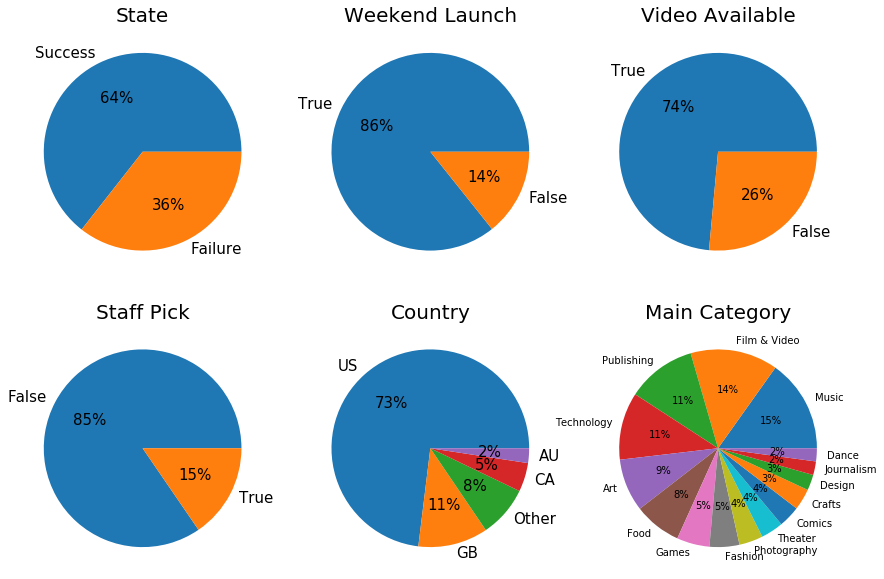

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15, 10))
fsize = 15
df.state.value_counts().plot(kind='pie',ax=axes[0,0],title='State',autopct='%1.0f%%',labels=['Success','Failure'],fontsize=fsize)
df.yes_weekend.value_counts().plot(kind='pie',ax=axes[0,1],title='Weekend Launch',autopct='%1.0f%%',labels=['True','False'],fontsize=fsize)
df.yes_video.value_counts().plot(kind='pie',ax=axes[0,2],title='Video Available',autopct='%1.0f%%',labels=['True','False'],fontsize=fsize)
oldData.staff_pick.value_counts().plot(kind='pie',title='Staff Pick',ax=axes[1,0],autopct='%1.0f%%',fontsize=fsize)
dfTemp = oldData.country
dfTemp = dfTemp.apply(lambda x: "Other" if (x!='US' and x!= 'GB' and x!= 'CA' and x !='AU') else x)
dfTemp.value_counts().plot(kind='pie',title='Country',ax=axes[1,1],autopct='%1.0f%%',fontsize=fsize)
oldData.main_category.value_counts().plot(kind='pie',title='Main Category',ax=axes[1,2],autopct='%1.0f%%',fontsize=10)
# oldData.staff_pick.value_counts().plot(kind='pie',title='Staff Pick',ax=axes[1,2],autopct='%1.0f%%',fontsize=10)

axes[0,0].set_ylabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,0].set_ylabel('')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')

axes[0,0].title.set_size(20)
axes[0,1].title.set_size(20)
axes[0,2].title.set_size(20)
axes[1,0].title.set_size(20)
axes[1,1].title.set_size(20)
axes[1,2].title.set_size(20)
fig.subplots_adjust(wspace=0.1)
fig.savefig('pies.eps',bbox_inches='tight')


In [13]:
df.describe().to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\n{} &            id &  usd\\_goal\\_real &         state &  usd\\_pledged\\_real &    imageCount &  category\\_freq &  main\\_category\\_freq &  country\\_freq &    month\\_sine &      day\\_sine &      no\\_video &     yes\\_video &    no\\_weekend &   yes\\_weekend &      duration &  mean\\_category\\_goal &  category\\_count &  mean\\_main\\_category\\_goal &  main\\_category\\_count &  diff\\_mean\\_category\\_goal &  diff\\_mean\\_main\\_category\\_goal &  blurbNumWords &  blurbNumSents &  blurbAvgSentLength &  blurbMaxSyllables &  blurbSpellingErrors &  aboutNumWords &  aboutNumSents &  aboutAvgSentLength &  aboutMaxSyllables &  aboutSpellingErrors &  risksNumWords &  risksNumSents &  risksAvgSentLength &  risksMaxSyllables &  risksSpellingErrors &      cSuccess &        cTotal \\\\\n\\midrule\ncount &  6.921000e+04 &   69210.000000 &  69210.000000 &      69210.000000 &  69210.000000 &   69210.000000 &        6

In [14]:
np.sum(df.state==1)

44580

In [15]:
mask = np.divide(np.exp(df.usd_pledged_real)-1,np.exp(df.usd_goal_real)-1)>=0.5


([array([0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 5.000e+00,
         1.800e+01, 3.700e+01, 4.600e+01, 5.200e+01, 1.140e+02, 1.740e+02,
         3.000e+02, 4.450e+02, 8.120e+02, 1.314e+03, 1.971e+03, 2.728e+03,
         3.104e+03, 3.746e+03, 4.769e+03, 5.131e+03, 4.702e+03, 4.275e+03,
         3.392e+03, 2.597e+03, 1.928e+03, 1.319e+03, 8.280e+02, 6.100e+02,
         3.730e+02, 2.350e+02, 1.560e+02, 1.040e+02, 7.500e+01, 4.000e+01,
         3.200e+01, 7.000e+00, 5.000e+00, 6.000e+00]),
  array([6.862e+03, 2.000e+00, 3.410e+02, 1.970e+02, 2.610e+02, 1.670e+02,
         4.360e+02, 5.920e+02, 8.420e+02, 8.740e+02, 1.273e+03, 1.358e+03,
         1.691e+03, 1.690e+03, 2.138e+03, 2.418e+03, 3.064e+03, 3.735e+03,
         4.081e+03, 4.514e+03, 5.396e+03, 5.609e+03, 5.059e+03, 4.530e+03,
         3.572e+03, 2.694e+03, 1.980e+03, 1.343e+03, 8.360e+02, 6.160e+02,
         3.760e+02, 2.380e+02, 1.560e+02, 1.040e+02, 7.500e+01, 4.000e+01,
         3.200e+01, 7.000e+00, 5.000e+00, 6.0

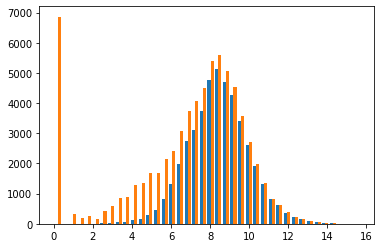

In [16]:
plt.hist([df[mask]['usd_pledged_real'],df['usd_pledged_real']],bins=40)
# plt.hist(,bins=40)

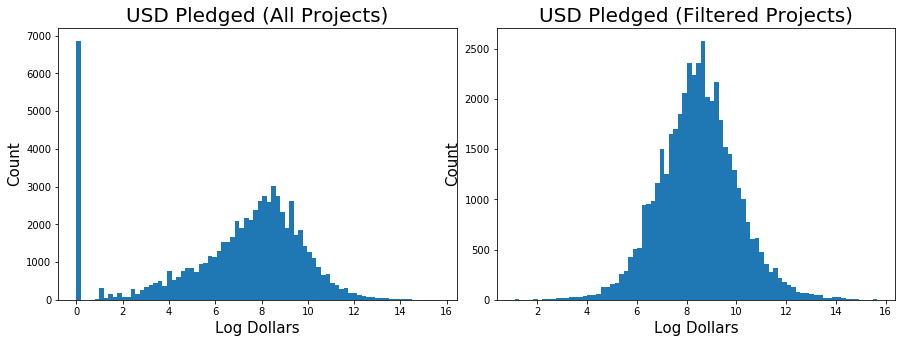

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].hist([df['usd_pledged_real']],bins=80)
ax[1].hist([df[mask]['usd_pledged_real']],bins=80)
ax[0].set_xlabel('Log Dollars', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].set_title('USD Pledged (All Projects)',fontsize=20)
ax[1].set_xlabel('Log Dollars', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)
ax[1].set_title('USD Pledged (Filtered Projects)',fontsize=20)
fig.subplots_adjust(wspace=0.1)
fig.savefig('transform.eps',bbox_inches='tight')


In [40]:
df.state==1

0         True
1         True
2         True
3         True
4         True
         ...  
69205     True
69206     True
69207     True
69208    False
69209     True
Name: state, Length: 69210, dtype: bool

In [55]:
sucMask = df.state==1
failMask = df.state==-1
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df)

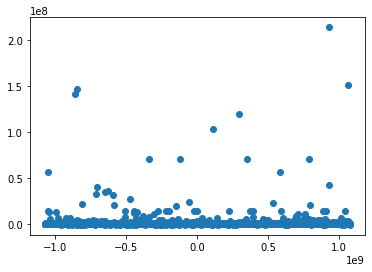

In [56]:
plt.scatter(principalComponents[:,0][failMask],principalComponents[:,1][failMask])

# plt.scatter(principalComponents[:,0][sucMask],principalComponents[:,1][sucMask])


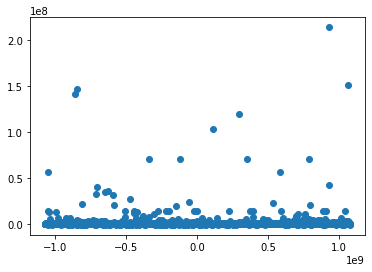

In [57]:
plt.scatter(principalComponents[:,0],principalComponents[:,1])


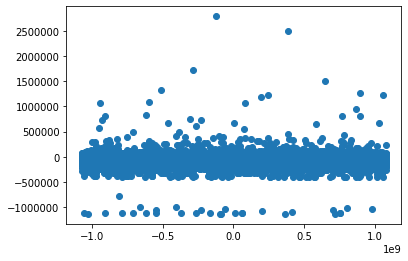

In [58]:
plt.scatter(principalComponents[:,0][sucMask],principalComponents[:,1][sucMask])
